In [1]:
import numpy as np
from sklearn.metrics import r2_score

## 多元线性回归推导过程

1.构建X_b,目的是适应theta0
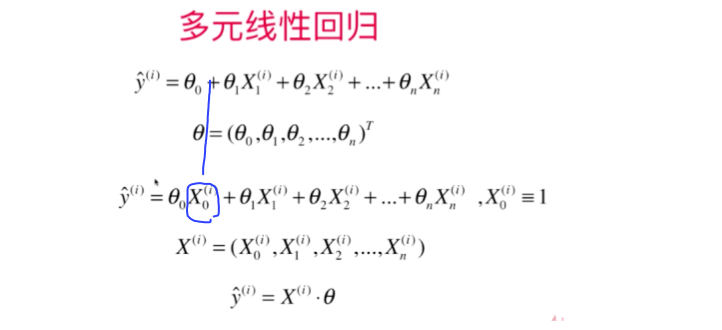

2.构建目标函数
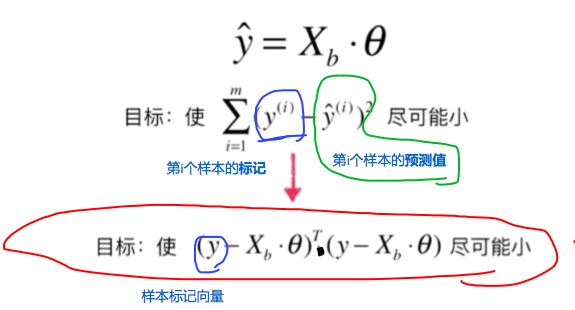

3.得出正规方程解

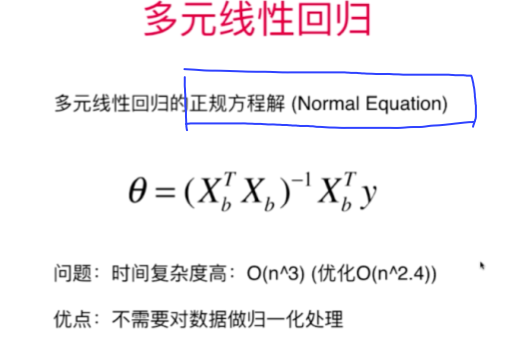

In [2]:
class LinearRegression:

    def __init__(self):
        """初始化Linear Regression模型"""
        #由于不是人为定出的参数值,所以在后面加下划线
        self.coef_ = None
        self.interception_ = None
        #theta为私有变量,前面加下划线
        self._theta = None
        
        
    def fit_normal(self,X_train,y_train):
        """根据训练数据集X_train, y_train训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        
        #先构建X_b
        X_b = np.hstack([np.ones((len(X_train),1)),X_train])
        #再构建theta
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        #用户需要查看的是系数和截距
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def predict(self,X_predict):
    
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
            
        #新传入X_predict矩阵,特征数量相同,样本数可能不同,计算对应的X_b
        X_b = np.hstack([np.ones((len(X_predict),1)),X_predict])
        #计算y_hat
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
        
        
    def __repr__(self):
        return "LinearRegression()"

### 实现多元线性回归模型

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
boston  = datasets.load_boston()

In [5]:
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [6]:
# 观察,X具有13个特征
X.shape

(490, 13)

In [7]:
#trian test split 操作
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state = 666)

In [8]:
reg = LinearRegression()

In [9]:
reg.fit_normal(X,y)

LinearRegression()

In [10]:
reg.coef_

array([ -1.05574295e-01,   3.52748549e-02,  -4.35179251e-02,
         4.55405227e-01,  -1.24268073e+01,   3.75411229e+00,
        -2.36116881e-02,  -1.21088069e+00,   2.50740082e-01,
        -1.37702943e-02,  -8.38888137e-01,   7.93577159e-03,
        -3.50952134e-01])

In [11]:
reg.interception_

32.261106875284788

In [12]:
# 可以看到R值是比较高的.

In [13]:
reg.score(X_test,y_test)

0.81268361369498821

### 使用scikit-learn 进行多元线性回归.

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lin_reg.coef_

array([ -1.14235739e-01,   3.12783163e-02,  -4.30926281e-02,
        -9.16425531e-02,  -1.09940036e+01,   3.49155727e+00,
        -1.40778005e-02,  -1.06270960e+00,   2.45307516e-01,
        -1.23179738e-02,  -8.80618320e-01,   8.43243544e-03,
        -3.99667727e-01])

In [17]:
lin_reg.intercept_

32.645660839653587

In [18]:
lin_reg.score(X_test,y_test)

0.80089161995191116

### KNN regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor()

In [22]:
reg_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [23]:
#使用KNN 回归,效果没有多元线性回归这么好.
reg_knn.score(X_test,y_test)

0.60267450508095299